In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

**Functions**

In [2]:
def histogram(variable):
    train_data[variable].hist(bins=50, figsize=(10,8))
def print_metrics(true, predicted):
    print(f'Accuracy: {accuracy_score(true, predicted)}')
    print(f'Precision: {precision_score(true, predicted)}')
    print(f'Recall: {recall_score(true, predicted)}')
    print(f'F1: {f1_score(true, predicted)}')
def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.legend(loc="best", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    
    plt.grid(True)                      
    plt.axis([-20000, 20000, 0, 1])
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16) 
    plt.grid(True)                                          

**Load Data**

In [3]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

**EDA**

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Outcome - Survived
print('Survived')
train_data['Survived'].value_counts()

Survived


0    549
1    342
Name: Survived, dtype: int64

In [9]:
y = train_data['Survived']
y.shape

(891,)

In [10]:
cat_list = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for item in cat_list:
    print(item)
    print(train_data[item].value_counts())
    print()

Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64

Sex
male      577
female    314
Name: Sex, dtype: int64

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64



In [11]:
corr_matrix = train_data.corr()

In [12]:
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

*Other unsummarized variables*
* Ticket
* Cabin

**Visualize**

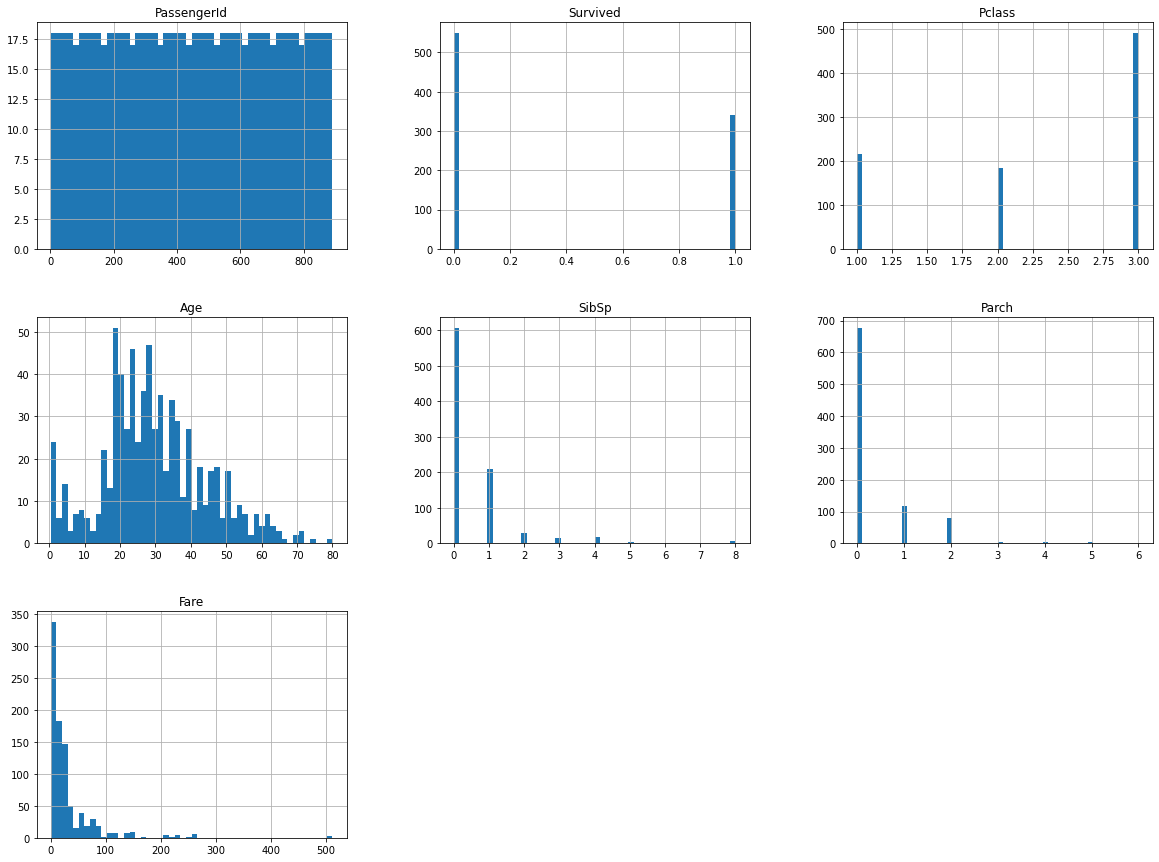

In [13]:
train_data.hist(bins=50, figsize=(20,15));

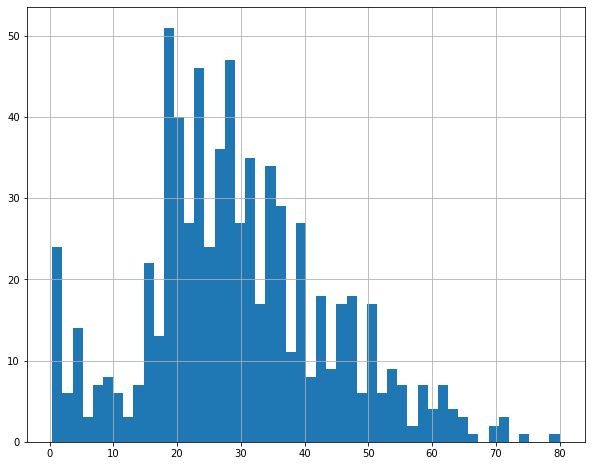

In [14]:
histogram('Age')

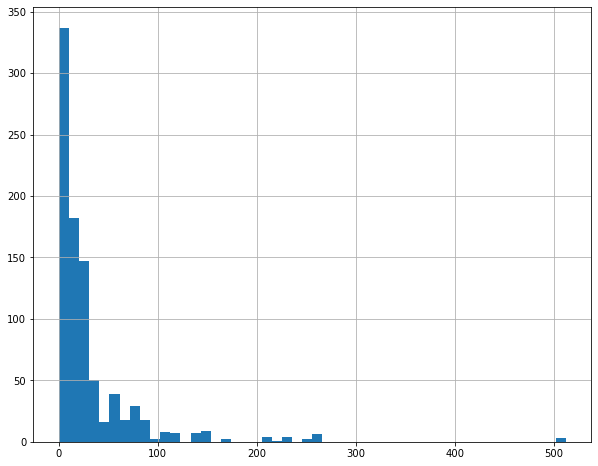

In [15]:
histogram('Fare')

In [16]:
scatter_attribs = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

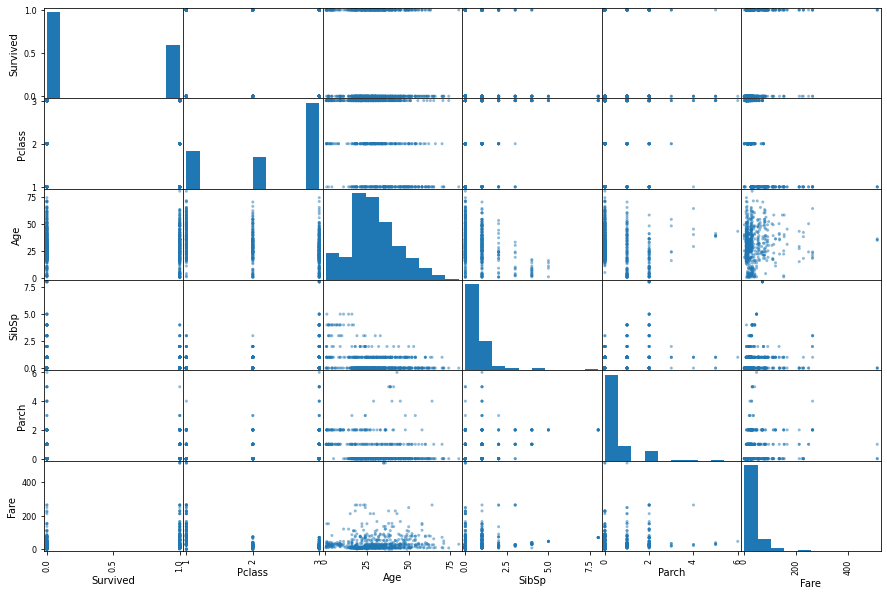

In [17]:
pd.plotting.scatter_matrix(train_data[scatter_attribs], figsize=(15,10));

**Factor Engineering**

In [18]:
# Create cabin variable that splits the front letter off the number
train_data['cabin_let'] = train_data['Cabin'].str[0]
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_let
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,NaN


In [19]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_let
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,NaN


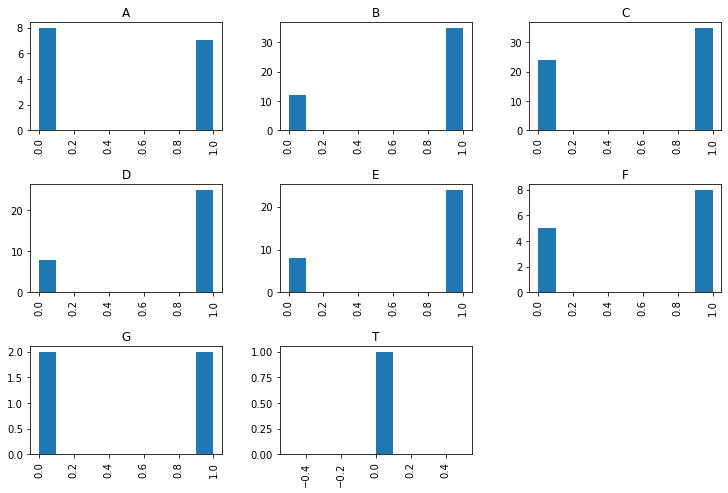

In [20]:
train_data['Survived'].hist(by=train_data['cabin_let'], figsize=(12,8));

In [21]:
train_data['cabin_let'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: cabin_let, dtype: int64

**Handle missing data**

In [22]:
# dropping missing Embarked values
train_data = train_data.dropna(subset=['Embarked'])
# create new outcome variable with these drops included
y = train_data['Survived']
y.shape

(889,)

In [23]:
train_num = train_data[['Age', 'Fare', 'SibSp', 'Parch']]

In [24]:
train_num.head()

,Age,Fare,SibSp,Parch
0,22.0,7.2500,1,0
1,38.0,71.2833,1,0
2,26.0,7.9250,0,0
3,35.0,53.1000,1,0
4,35.0,8.0500,0,0


In [25]:
# create imputer for missing data - filling in with median value
imputer = SimpleImputer(strategy='median')
imputer.fit(train_num)
print(train_num.columns)
print(imputer.statistics_)
print(train_num.median().values)

Index(['Age', 'Fare', 'SibSp', 'Parch'], dtype='object')
[28.     14.4542  0.      0.    ]
[28.     14.4542  0.      0.    ]


In [26]:
imputed = imputer.transform(train_num)
imputed
# imputed is an array

array([[22.    ,  7.25  ,  1.    ,  0.    ],
       [38.    , 71.2833,  1.    ,  0.    ],
       [26.    ,  7.925 ,  0.    ,  0.    ],
       ...,
       [28.    , 23.45  ,  1.    ,  2.    ],
       [26.    , 30.    ,  0.    ,  0.    ],
       [32.    ,  7.75  ,  0.    ,  0.    ]])

In [27]:
# make imputed array into a data frame
num_tr = pd.DataFrame(imputed, columns=train_num.columns, index=train_num.index)
num_tr.head()

,Age,Fare,SibSp,Parch
0,22.0,7.2500,1.0,0.0
1,38.0,71.2833,1.0,0.0
2,26.0,7.9250,0.0,0.0
3,35.0,53.1000,1.0,0.0
4,35.0,8.0500,0.0,0.0


In [28]:
num_tr.describe()

,Age,Fare,SibSp,Parch
count,889.000000,889.000000,889.000000,889.000000
mean,29.315152,32.096681,0.524184,0.382452
std,12.984932,49.697504,1.103705,0.806761
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,7.895800,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,35.000000,31.000000,1.000000,0.000000
max,80.000000,512.329200,8.000000,6.000000


Handle categorical variables

In [29]:
train_cats = train_data[['Pclass', 'Sex', 'Embarked']]
print(train_cats.head())
print(train_cats.info())

   Pclass     Sex Embarked
0       3    male        S
1       1  female        C
2       3  female        S
3       1  female        S
4       3    male        S
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    889 non-null    int64 
 1   Sex       889 non-null    object
 2   Embarked  889 non-null    object
dtypes: int64(1), object(2)
memory usage: 27.8+ KB
None


In [30]:
# passenger class has an inherent order to it
train_cats_chars = train_cats.drop('Pclass', axis=1)
train_cats_chars.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [31]:
train_cats_chars['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
# not going with ordinal encoder leaving code here for reference
# ordinal_encoder = OrdinalEncoder()
# train_cats_chars_encoded = ordinal_encoder.fit_transform(train_cats_chars)
# train_cats_chars_encoded[:10]

In [33]:
catencoder = OneHotEncoder()
cats_1hot = catencoder.fit_transform(train_cats_chars)
# catencoder puts into sparse matrix, toarray creates a normal looking array
cats_1hot.toarray()

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [34]:
catencoder.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

At this point we have an array of the continuous variables, imputed (as well as a data frame of them as well, the two categorical variables sex and embarked in an array, and then also class sitting out by itself, at this point we need to combine them all into one big array for analysis

In [35]:
pclass = train_cats['Pclass']
print(pclass.head())
print(pclass.value_counts())
print(pclass.describe())

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64
3    491
1    214
2    184
Name: Pclass, dtype: int64
count    889.000000
mean       2.311586
std        0.834700
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64


In [36]:
pclass_arr = pclass.to_numpy()
pclass_arr = pclass_arr.reshape(-1,1)

In [37]:
print(imputed.shape)
print(cats_1hot.shape)
print(pclass_arr.shape)

(889, 4)
(889, 5)
(889, 1)


In [38]:
print(type(imputed))
print(type(cats_1hot))
print(type(pclass_arr))

<class 'numpy.ndarray'>
<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.ndarray'>


In [39]:
cats_arr = cats_1hot.toarray()
type(cats_arr)

numpy.ndarray

In [40]:
con_1 = np.concatenate((imputed,cats_arr), axis=1)
X = np.concatenate((con_1,pclass_arr), axis=1)
X.shape

(889, 10)

In [41]:
# this and below check that arrays were restacked in order... and they were
X[0:2, :]

array([[22.    ,  7.25  ,  1.    ,  0.    ,  0.    ,  1.    ,  0.    ,
         0.    ,  1.    ,  3.    ],
       [38.    , 71.2833,  1.    ,  0.    ,  1.    ,  0.    ,  1.    ,
         0.    ,  0.    ,  1.    ]])

In [42]:
X[-3:, :]

array([[28.  , 23.45,  1.  ,  2.  ,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,
         3.  ],
       [26.  , 30.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,  0.  ,  0.  ,
         1.  ],
       [32.  ,  7.75,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,
         3.  ]])

**Modeling**<br>
At this point I have an array with my preditor variables, X and an array with my outcome variable, y.

**Stochastic Gradient Descent (SGD) Classifier**

In [43]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X,y)

SGDClassifier(random_state=42)

In [44]:
sgd_clf.predict(X[0:5])

array([0, 1, 0, 0, 0])

In [45]:
y[0:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [46]:
# Cross validate
cross_val_score(sgd_clf, X, y, cv=5, scoring='accuracy')

array([0.70786517, 0.61235955, 0.69662921, 0.70786517, 0.74576271])

In [47]:
y_sgd_pred = cross_val_predict(sgd_clf, X, y, cv=5)

In [48]:
confusion_matrix(y, y_sgd_pred)

array([[427, 122],
       [150, 190]])

In [49]:
precision_score(y, y_sgd_pred)

0.6089743589743589

In [50]:
recall_score(y, y_sgd_pred)

0.5588235294117647

In [51]:
f1_score(y, y_sgd_pred)

0.5828220858895705

In [52]:
y_scores = cross_val_predict(sgd_clf, X, y, cv=5, method='decision_function')
y_scores[:5]

array([-584.48387404, 2260.55459483,  259.89167714, 1565.52353469,
       -540.52201014])

In [53]:
sgd_precisions, sgd_recalls, sgd_thresholds = precision_recall_curve(y, y_scores)

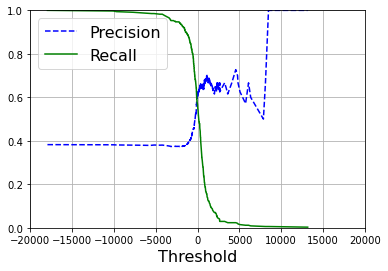

In [54]:
plot_precision_recall_vs_thresholds(sgd_precisions, sgd_recalls, sgd_thresholds)

In [55]:
# aiming for 70% precision (recall for this will be low, but experimenting)
sgd_threshold_90_precision = sgd_thresholds[np.argmax(sgd_precisions >= 0.7)]
sgd_threshold_90_precision

1108.4593468193352

In [56]:
y_pred_90 = (y_scores >= sgd_threshold_90_precision)
print(precision_score(y, y_pred_90))
print(recall_score(y, y_pred_90))

0.7066666666666667
0.15588235294117647


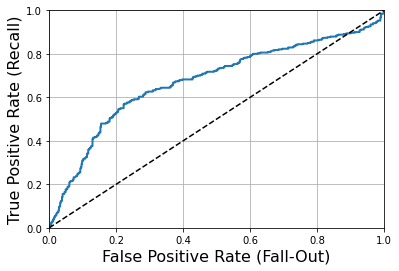

In [57]:
sgd_fpr, sgd_tpr, sgd_thresholds_roc = roc_curve(y, y_scores)
plot_roc_curve(sgd_fpr, sgd_tpr)

In [58]:
roc_auc_score(y, y_scores)

0.6738187078109933

**Decision Tree Classifier**

In [59]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [60]:
tree_clf.predict_proba(X[:5])

array([[0.8318264 , 0.1681736 ],
       [0.05357143, 0.94642857],
       [0.5       , 0.5       ],
       [0.05357143, 0.94642857],
       [0.8318264 , 0.1681736 ]])

In [61]:
tree_clf.predict(X[:5])

array([0, 1, 0, 1, 0])

In [62]:
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [63]:
print_metrics(y, tree_clf.predict(X))

Accuracy: 0.7952755905511811
Precision: 0.9114583333333334
Recall: 0.5147058823529411
F1: 0.6578947368421052


In [64]:
# Cross validate
cross_val_score(tree_clf, X, y, cv=5, scoring='accuracy')

array([0.74719101, 0.79213483, 0.78651685, 0.75280899, 0.78531073])

In [65]:
y_tree_pred = cross_val_predict(tree_clf, X, y, cv=5)

In [66]:
confusion_matrix(y, y_tree_pred)

array([[494,  55],
       [147, 193]])

In [67]:
print_metrics(y, y_tree_pred)

Accuracy: 0.7727784026996626
Precision: 0.7782258064516129
Recall: 0.5676470588235294
F1: 0.6564625850340137


**Random Forest Classifier**

In [68]:
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X,y)

RandomForestClassifier(random_state=42)

In [69]:
y_forest_pred = forest_clf.predict(X)

In [70]:
confusion_matrix(y, y_forest_pred)

array([[544,   5],
       [ 13, 327]])

In [71]:
print_metrics(y, forest_clf.predict(X))

Accuracy: 0.9797525309336333
Precision: 0.9849397590361446
Recall: 0.961764705882353
F1: 0.9732142857142858


In [72]:
y_forest_pred_xval = cross_val_predict(forest_clf, X, y, cv=5)
y_forest_pred_xval[:5]

array([0, 1, 1, 1, 0])

In [73]:
confusion_matrix(y, y_forest_pred_xval)

array([[479,  70],
       [ 94, 246]])

In [74]:
print_metrics(y, y_forest_pred_xval)

Accuracy: 0.8155230596175478
Precision: 0.7784810126582279
Recall: 0.7235294117647059
F1: 0.75


**Logistic Regression Classifier**

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [76]:
X_scaled = scaler.fit_transform(X)

In [77]:
X_scaled[:5]

array([[-0.56367407, -0.50023975,  0.43135024, -0.47432585, -0.73534203,
         0.73534203, -0.48271079, -0.30794088,  0.61679395,  0.82520863],
       [ 0.66921696,  0.78894661,  0.43135024, -0.47432585,  1.35991138,
        -1.35991138,  2.07163382, -0.30794088, -1.62128697, -1.57221121],
       [-0.25545131, -0.48664993, -0.47519908, -0.47432585,  1.35991138,
        -1.35991138, -0.48271079, -0.30794088,  0.61679395,  0.82520863],
       [ 0.43804989,  0.42286111,  0.43135024, -0.47432585,  1.35991138,
        -1.35991138, -0.48271079, -0.30794088,  0.61679395, -1.57221121],
       [ 0.43804989, -0.4841333 , -0.47519908, -0.47432585, -0.73534203,
         0.73534203, -0.48271079, -0.30794088,  0.61679395,  0.82520863]])

In [78]:
log_reg = LogisticRegression()
log_reg.fit(X_scaled,y)

LogisticRegression()

In [79]:
log_reg.predict(X_scaled[:5])

array([0, 1, 1, 1, 0])

In [80]:
log_reg.predict_proba(X_scaled[:5])

array([[0.91199212, 0.08800788],
       [0.07954755, 0.92045245],
       [0.37089258, 0.62910742],
       [0.10764617, 0.89235383],
       [0.92547345, 0.07452655]])

In [81]:
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [82]:
y_logistic_pred = cross_val_predict(log_reg, X_scaled, y, cv=5)
y_logistic_pred[:5]

array([0, 1, 1, 1, 0])

In [83]:
confusion_matrix(y, y_logistic_pred)

array([[463,  86],
       [105, 235]])

In [84]:
print_metrics(y, y_logistic_pred)

Accuracy: 0.7851518560179978
Precision: 0.7320872274143302
Recall: 0.6911764705882353
F1: 0.7110438729198184


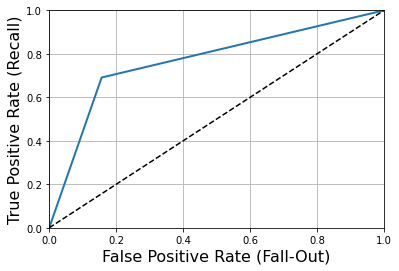

In [85]:
log_fpr, log_tpr, log_thresholds_roc = roc_curve(y, y_logistic_pred)
plot_roc_curve(log_fpr, log_tpr)

**Put the models to the test data!**

In [86]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Process test data like training data

In [87]:
test_data = test_data.dropna(subset=['Embarked'])
# would create a new outcome y variable here if it was available

In [95]:
test_num = test_data[['Age', 'Fare', 'SibSp', 'Parch']]

In [96]:
# impute the missing data
imputer.fit(test_num)
print(imputer.statistics_)
print(test_num.median().values)

[27.     14.4542  0.      0.    ]
[27.     14.4542  0.      0.    ]


In [98]:
test_imputed = imputer.transform(test_num)

In [100]:
test_cats = test_data[['Pclass', 'Sex', 'Embarked']]
test_cats_chars = test_cats.drop('Pclass', axis=1)

In [102]:
test_cats_1hot = catencoder.fit_transform(test_cats_chars)
test_cats_arr = test_cats_1hot.toarray()

In [106]:
test_pclass = test_data['Pclass']
test_pclass_arr = test_pclass.to_numpy()
test_pclass_arr = test_pclass_arr.reshape(-1,1)

In [107]:
print(test_imputed.shape)
print(test_cats_arr.shape)
print(test_pclass_arr.shape)

(418, 4)
(418, 5)
(418, 1)


In [108]:
test_con_1 = np.concatenate((test_imputed, test_cats_arr), axis=1)
X_test = np.concatenate((test_con_1, test_pclass_arr), axis=1)
X_test.shape

(418, 10)

In [109]:
X_test

array([[34.5   ,  7.8292,  0.    , ...,  1.    ,  0.    ,  3.    ],
       [47.    ,  7.    ,  1.    , ...,  0.    ,  1.    ,  3.    ],
       [62.    ,  9.6875,  0.    , ...,  1.    ,  0.    ,  2.    ],
       ...,
       [38.5   ,  7.25  ,  0.    , ...,  0.    ,  1.    ,  3.    ],
       [27.    ,  8.05  ,  0.    , ...,  0.    ,  1.    ,  3.    ],
       [27.    , 22.3583,  1.    , ...,  0.    ,  0.    ,  3.    ]])

Test data set is prepared for analysis, but I do